### Used Cars Price Prediction - Random Forest
Ahmad Sotoude <br>
<a href="https://github.com/ahmadsotoude">link to github</a>

importing necessary libs and dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('OLX_cars_dataset00.csv')
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


checking different values each column holds:

In [3]:
print(df['Condition'].value_counts())
print('--------------')
print(df['Fuel'].value_counts())
print('--------------')
print(df['Make'].value_counts())
print('--------------')
print(df['Car documents'].value_counts())

Condition
Used    9179
Name: count, dtype: int64
--------------
Fuel
Petrol    8984
CNG        193
Hybrid       1
Diesel       1
Name: count, dtype: int64
--------------
Make
Suzuki        3048
Honda         1758
Toyota        1606
Daihatsu      1373
Hyundai        460
Mitsubishi     249
KIA            234
Changan        192
FAW            137
Chevrolet       77
Mercedes        45
Name: count, dtype: int64
--------------
Car documents
Original     9111
Duplicate      68
Name: count, dtype: int64


In [4]:
ndf = df.drop(['Car Name','Model','Registration city','Assembly','Condition','Seller Location','Description',"Images URL's",'Car Profile'],axis=1)
ndf.head()

,Ad ID,Make,Year,KM's driven,Price,Fuel,Car documents,Transmission,Car Features
0,1079071571,Toyota,2021,54000,4190000,Petrol,Original,Automatic,"ABS, Air Bags, AM/FM Radio, CD Player, Cassett..."
1,1080125520,Suzuki,2018,95000,1300000,Petrol,Original,Manual,AM/FM Radio
2,1080748789,Suzuki,2015,50000,800000,Petrol,Original,Manual,Rear speakers
3,1076081635,Daihatsu,2013,94000,2155000,Petrol,Original,Automatic,"ABS, Air Bags, Air Conditioning, Alloy Rims, A..."
4,1080812928,Suzuki,2011,126544,1440000,Petrol,Original,Manual,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio..."


checking for NULL values:

In [5]:
print(ndf.info())
print('--------------')
print(ndf.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Ad ID          9179 non-null   int64 
 1   Make           9179 non-null   object
 2   Year           9179 non-null   int64 
 3   KM's driven    9179 non-null   int64 
 4   Price          9179 non-null   int64 
 5   Fuel           9179 non-null   object
 6   Car documents  9179 non-null   object
 7   Transmission   9179 non-null   object
 8   Car Features   9179 non-null   object
dtypes: int64(4), object(5)
memory usage: 645.5+ KB
None
--------------
Ad ID            0
Make             0
Year             0
KM's driven      0
Price            0
Fuel             0
Car documents    0
Transmission     0
Car Features     0
dtype: int64


Some EDA and plotting to find relations

<Axes: xlabel='Car documents', ylabel='Price'>

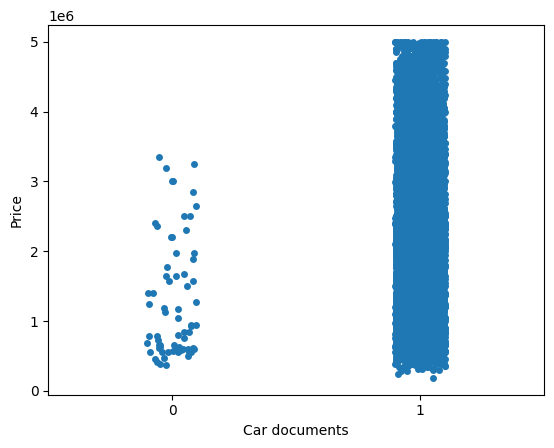

In [6]:
ndf.loc[ndf['Car documents'] == 'Original', 'Car documents'] = 1
ndf.loc[ndf['Car documents'] == 'Duplicate', 'Car documents'] = 0
sns.stripplot(x=ndf['Car documents'],y=ndf['Price'],jitter=True)

In [7]:
ndf.drop('Car documents', axis=1, inplace=True)

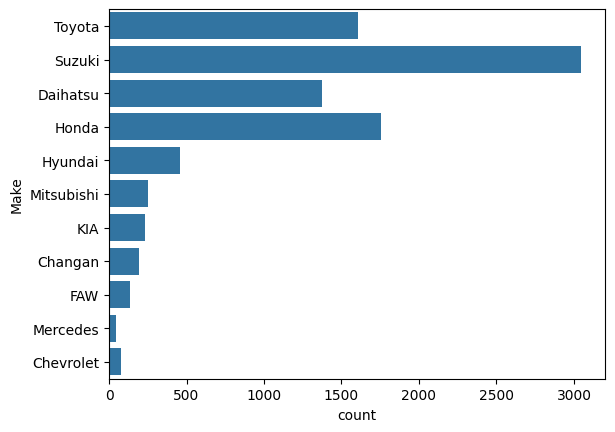

In [8]:
sns.countplot(ndf['Make'])
plt.show()

C:\Users\SAM-Tech\AppData\Local\Temp\ipykernel_8292\2350975893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x = ndf['Make'], y= ndf['Price'], palette=custom_palette)
C:\Users\SAM-Tech\AppData\Local\Temp\ipykernel_8292\2350975893.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


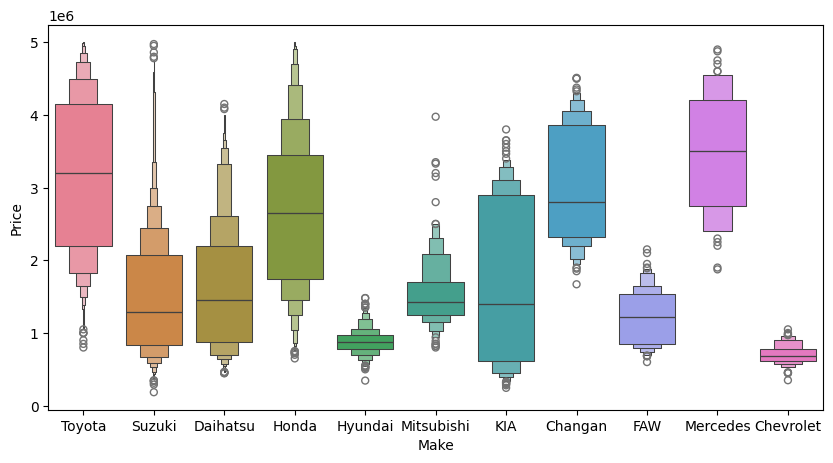

In [9]:
fig = plt.figure(figsize=(10,5))
custom_palette = sns.color_palette("husl", n_colors=11)
sns.set_palette(custom_palette)
sns.boxenplot(x = ndf['Make'], y= ndf['Price'], palette=custom_palette)
fig.show()

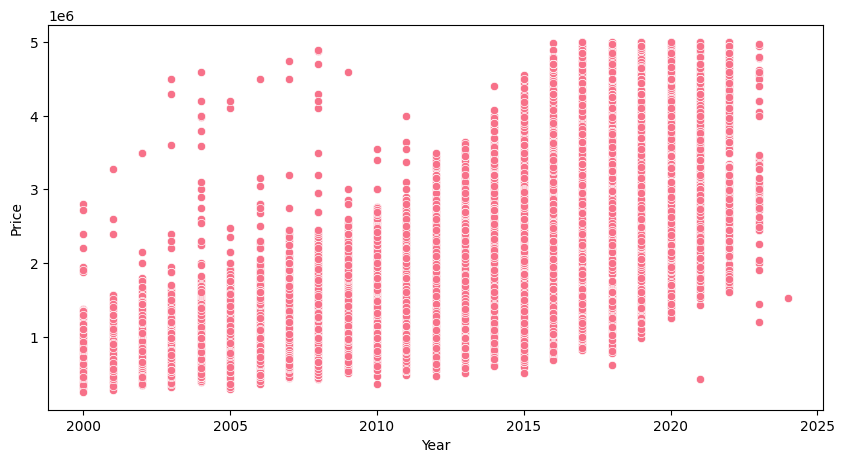

In [10]:
fig = plt.figure(figsize=(10,5))
after2000 = pd.DataFrame()
after2000 = ndf.loc[ndf['Year']>=2000]
sns.scatterplot(x = 'Year', y = 'Price',data=after2000)
plt.show()

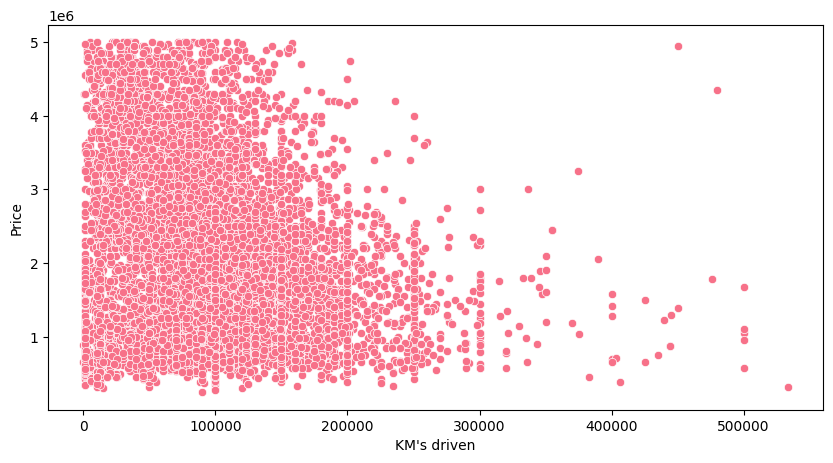

In [11]:
fig = plt.figure(figsize=(10,5))
after2000 = pd.DataFrame()
after2000 = ndf.loc[ndf['Year']>=2000]
sns.scatterplot(x = "KM's driven", y = 'Price',data=after2000)
plt.show()

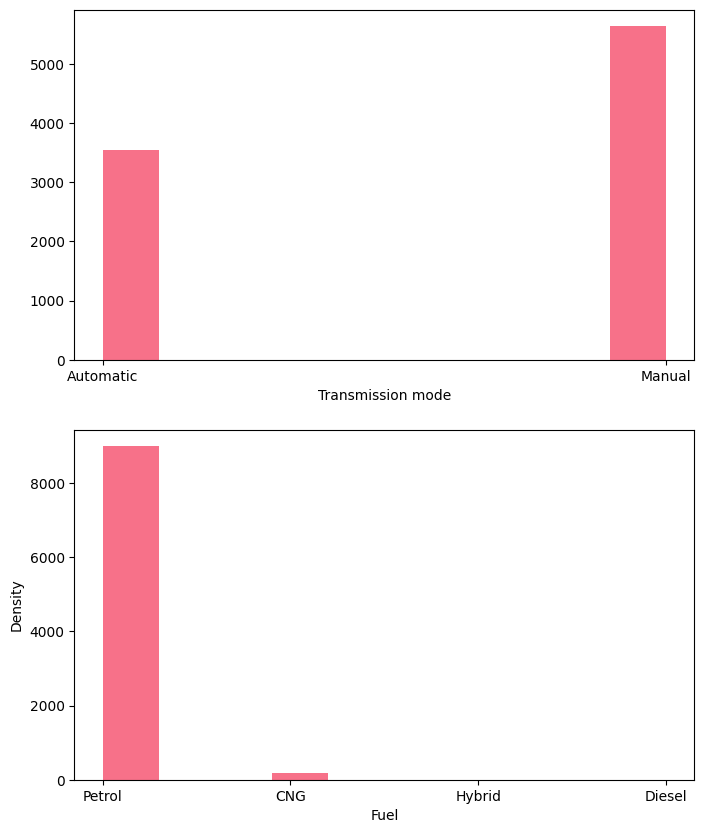

In [12]:
fig = plt.figure(figsize=(8, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.hist(ndf['Transmission'])
ax2.hist(ndf['Fuel'])
ax1.set_xlabel('Transmission mode')
ax2.set_ylabel('Density')

ax2.set_xlabel('Fuel')
ax2.set_ylabel('Density')
plt.show()

Binerizing values in Transmission column

In [13]:
ndf.loc[ndf['Transmission']=='Automatic','Transmission'] = 1
ndf.loc[ndf['Transmission']=='Manual','Transmission'] = 0

ndf.head()

,Ad ID,Make,Year,KM's driven,Price,Fuel,Transmission,Car Features
0,1079071571,Toyota,2021,54000,4190000,Petrol,1,"ABS, Air Bags, AM/FM Radio, CD Player, Cassett..."
1,1080125520,Suzuki,2018,95000,1300000,Petrol,0,AM/FM Radio
2,1080748789,Suzuki,2015,50000,800000,Petrol,0,Rear speakers
3,1076081635,Daihatsu,2013,94000,2155000,Petrol,1,"ABS, Air Bags, Air Conditioning, Alloy Rims, A..."
4,1080812928,Suzuki,2011,126544,1440000,Petrol,0,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio..."


Now we use one hot encoding method to create columns based on categorized data:

In [14]:
car_features = ndf['Car Features'].str.get_dummies(', ')
fuel_types = ndf['Fuel'].str.get_dummies()
car_make = ndf['Make'].str.get_dummies(', ')

ndf = pd.concat([ndf, car_features], axis=1)
ndf = pd.concat([ndf, fuel_types], axis=1)
ndf = pd.concat([ndf, car_make], axis=1)

ndf.drop('Car Features',axis=1, inplace=True)
ndf.drop('Fuel',axis=1, inplace=True)
ndf.drop('Make',axis=1, inplace=True)

ndf.head()

,Ad ID,Make,Year,KM's driven,Price,Transmission,ABS,AM/FM Radio,Air Bags,Air Conditioning,...,Rear Camera,Rear Seat Entertainment,Rear speakers,Steering Switches,Sun Roof,USB and Auxillary Cable,CNG,Diesel,Hybrid,Petrol
0,1079071571,Toyota,2021,54000,4190000,1,1,1,1,0,...,1,0,1,0,0,0,0,0,0,1
1,1080125520,Suzuki,2018,95000,1300000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1080748789,Suzuki,2015,50000,800000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1076081635,Daihatsu,2013,94000,2155000,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1080812928,Suzuki,2011,126544,1440000,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1


Normalizing values in Year and KM's driven columns:

In [16]:
ndf['Year'] = ndf['Year']-ndf['Year'].min()
ndf['Year'] = ndf['Year']/ndf['Year'].max()

ndf["KM's driven"] = ndf["KM's driven"]-ndf["KM's driven"].min()
ndf["KM's driven"] = ndf["KM's driven"]/ndf["KM's driven"].max()

ndf.head()

,Ad ID,Year,KM's driven,Price,Transmission,ABS,AM/FM Radio,Air Bags,Air Conditioning,Alloy Rims,...,Chevrolet,Daihatsu,FAW,Honda,Hyundai,KIA,Mercedes,Mitsubishi,Suzuki,Toyota
0,1079071571,0.914286,0.101211,4190000,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1080125520,0.828571,0.178058,1300000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1080748789,0.742857,0.093714,800000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1076081635,0.685714,0.176184,2155000,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,1080812928,0.628571,0.237182,1440000,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


Picking X and Y from dataset for cross validation

In [29]:
X = ndf.drop(['Ad ID','Price'],axis=1).values
Y = ndf['Price'].values
print('x: ',X[0])
print('target val (y): ',Y[0])

x:  [0.9142857142857143 0.10121137262031725 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
target val (y):  4190000


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

Using cross validation we split data in 5 groups and each would be used for training and the other 4 for training. Using this function we can find the best value for n_estimators as we are using Random Forest method for prediction

In [33]:
from sklearn.model_selection import cross_val_score
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, Y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
    return scores.mean()


In [36]:
results = {}

for i in [300,400,500,600,700,800,900]:
    results[i] = get_score(i)

Let's find the optimal n_estimators value

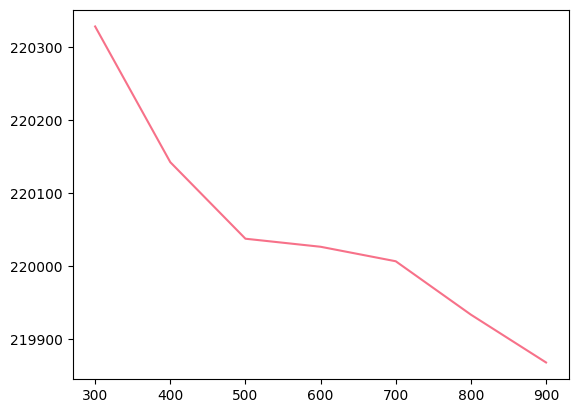

In [37]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

Now we should split the X and Y into train and test datasets and train the model using the train data:

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state = 0)

In [39]:
model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

Checking the error (MAE) on the test data:

In [40]:
from sklearn.metrics import mean_absolute_error
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error on Test Set:", int(mae))

Mean Absolute Error on Test Set: 223699


Now we do predictions on some random values from test data:

In [41]:
random_indices = np.random.choice(len(X_test), size=5, replace=False)
random_X_samples = X_test[random_indices]
random_y_samples = y_test[random_indices]
for i in range(5):
    pred = model.predict(random_X_samples[i].reshape(1,-1))
    print(i + 1,')----------------------')
    print('actual price:    ', random_y_samples[i])
    print('predicted price: ', int(pred[0]))
    print('error:           ',(np.abs(pred - random_y_samples[i]))[0].astype(int))
    

1 )----------------------
actual price:     1000000
predicted price:  918031
error:            81968
2 )----------------------
actual price:     3280000
predicted price:  3236340
error:            43660
3 )----------------------
actual price:     400000
predicted price:  460060
error:            60060
4 )----------------------
actual price:     1480000
predicted price:  1864036
error:            384036
5 )----------------------
actual price:     3499000
predicted price:  3542060
error:            43060


In [62]:
error_percentage = mae/y_test.mean()
print("MAE / y_test * 100: %.2f percent" % (error_percentage*100))

MAE / y_test * 100: 10.99 percent


though the MAE on the whole test data is a sensible number (almost 11 percent inaccurate), there is still room for improvement on this model. Using XGBoost probably is a good idea...